In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Apprentissage supervisé : Feature engineering et Classification

# Import Data

In [2]:
df = pd.read_csv('credit_scoring.csv', sep=';')
df.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [3]:
df.shape

(4375, 14)

In [4]:
df_Y = df.iloc[:, -1]
df_X = df.iloc[:, :-1]

In [5]:
df_Y.shape

(4375,)

In [6]:
df_X

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1.0,1.0,60.0,39.0,0.0,1.0,0.0,69.0,92.0,0.0,0.0,900.0,1020.0
4371,22.0,0.0,60.0,46.0,0.0,1.0,0.0,60.0,75.0,3000.0,600.0,950.0,1263.0
4372,0.0,0.0,24.0,37.0,0.0,1.0,1.0,60.0,90.0,3500.0,0.0,500.0,963.0
4373,0.0,1.0,48.0,23.0,1.0,1.0,1.0,49.0,140.0,0.0,0.0,550.0,550.0


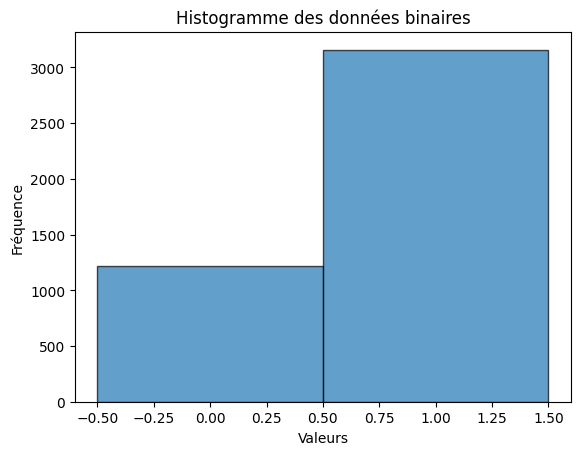

In [7]:
plt.hist(df_Y, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)

# Ajouter des titres et des étiquettes
plt.title('Histogramme des données binaires')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.5, random_state=1)

## 1 Training

### Decison Tree Classifier

In [9]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

def decision_classifier(x_train, y_train):
    print('Decision Tree classifier')
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)

    return clf    

### KNN classifier

In [10]:
def knn_classifier(x_train, y_train):
    print('KNN classifier')
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh = neigh.fit(x_train, y_train)

    return neigh

### MLP classifier

In [11]:
def mlp_classifier(x_train, y_train):
    print('MLP classifier')
    mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(40,20))
    mlp = mlp.fit(x_train, y_train)

    return mlp 

In [12]:
def build_and_train_model(classification_fn, x_train, x_test):
    model = classification_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)    
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print('Accuracy : ', acc)
    print('Precision score : ', pre)
    print('Recall score : ', recall)

In [13]:
build_and_train_model(knn_classifier, x_train, x_test)

KNN classifier
Training Score :  0.8267032464563329
Accuracy :  0.7070383912248629
Precision score :  0.7668364459535937
Recall score :  0.8554292929292929


In [14]:
build_and_train_model(decision_classifier, x_train, x_test)

Decision Tree classifier
Training Score :  1.0
Accuracy :  0.7239488117001828
Precision score :  0.8141025641025641
Recall score :  0.8017676767676768


In [15]:
build_and_train_model(mlp_classifier, x_train, x_test)

MLP classifier
Training Score :  0.6735253772290809
Accuracy :  0.6704753199268738
Precision score :  0.8394964594807238
Recall score :  0.6736111111111112


## 2. Normalisation

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [17]:
build_and_train_model(knn_classifier, x_train_norm, x_test_norm)

KNN classifier
Training Score :  0.8577960676726109
Accuracy :  0.7458866544789763
Precision score :  0.8134146341463414
Recall score :  0.8421717171717171


In [18]:
build_and_train_model(decision_classifier, x_train_norm, x_test_norm)

Decision Tree classifier
Training Score :  1.0
Accuracy :  0.7212065813528337
Precision score :  0.8145994832041343
Recall score :  0.7960858585858586


In [19]:
build_and_train_model(mlp_classifier, x_train_norm, x_test_norm)

MLP classifier
Training Score :  0.8673982624599909
Accuracy :  0.776508226691042
Precision score :  0.8381717109326745
Recall score :  0.8566919191919192


## 3. Réduction de dimension 

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_train_norm)
# Apply transform to both the train set and the test set. 
x_train_pca = np.concatenate((x_train_norm, pca.transform(x_train_norm)),axis=1)
x_test_pca  = np.concatenate((x_test_norm, pca.transform(x_test_norm)),axis=1)

In [21]:
build_and_train_model(knn_classifier, x_train_pca, x_test_pca)

KNN classifier
Training Score :  0.8651120256058528
Accuracy :  0.7362888482632541
Precision score :  0.8098461538461539
Recall score :  0.8308080808080808


  File "C:\Users\bjauseau\AppData\Local\anaconda3\envs\MLTP\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [22]:
build_and_train_model(decision_classifier, x_train_pca, x_test_pca)

Decision Tree classifier
Training Score :  1.0
Accuracy :  0.7189213893967094
Precision score :  0.8232154769846565
Recall score :  0.7790404040404041


In [23]:
build_and_train_model(mlp_classifier, x_train_pca, x_test_pca)

MLP classifier
Training Score :  0.8692272519433013
Accuracy :  0.770109689213894
Precision score :  0.8269812462189957
Recall score :  0.8630050505050505


## 4. Selection de varibale

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


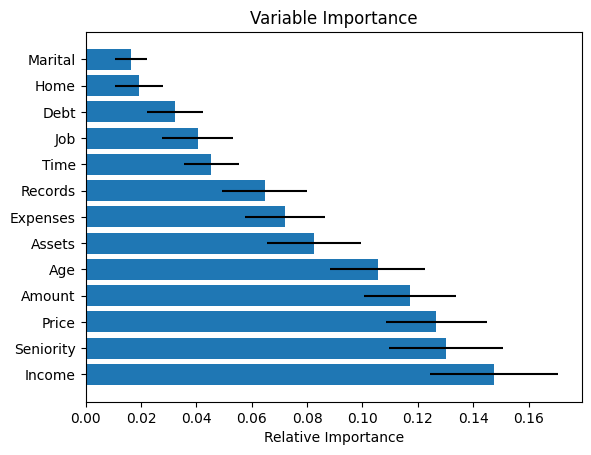

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train_norm, y_train)

importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = df.columns
print(features[sorted_idx])
padding = np.arange(x_train_norm.size/len(x_train_norm)) + 0.5

plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

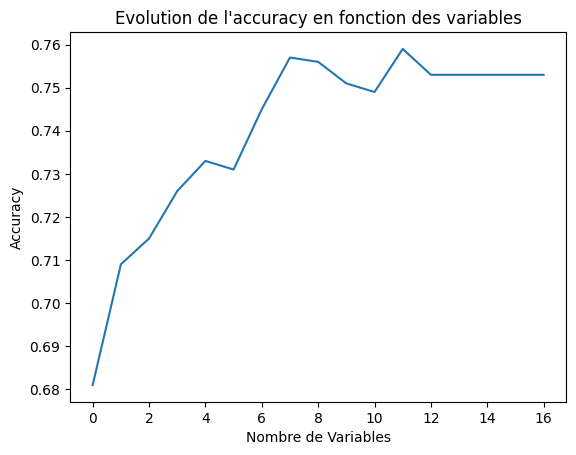

In [25]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(x_train_pca.shape[1]+1)

for f in np.arange(0, x_train_pca.shape[1]+1):
     X1_f = x_train_pca[:,sorted_idx[:f+1]]
     X2_f = x_test_pca[:,sorted_idx[:f+1]]
     KNN.fit(X1_f,y_train)
     YKNN=KNN.predict(X2_f)
     scores[f]=np.round(accuracy_score(y_test,YKNN),3)
    
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [26]:
max_var = np.argmax(scores)
Xtrain_opt = x_train_pca[:,sorted_idx[:max_var]]
Xtest_opt = x_test_pca[:,sorted_idx[:max_var]]

print("Le nombre de variables optimales est : " + str(max_var) + '\n')
print("Son accuracy est : " + str(np.amax(scores))  + '\n')
print("Les variables retenues sont : " + str(features[:max_var]))

Le nombre de variables optimales est : 11

Son accuracy est : 0.759

Les variables retenues sont : Index(['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job',
       'Expenses', 'Income', 'Assets', 'Debt'],
      dtype='object')


## 5. Parametrage des classifieurs 

In [27]:
from sklearn.model_selection import GridSearchCV
# Tunning - KNN
k_range        = list(range(1,31))
weight_options = ["uniform", "distance"]
algo           = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric         = ['euclidean','manhattan']
param_grid = dict(n_neighbors = k_range, 
                  weights = weight_options, 
                  algorithm = algo,
                  metric = metric)

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'accuracy')
grid_knn.fit(x_train_norm,  y_train)

print (grid_knn.best_score_)
print (grid_knn.best_params_)
print (grid_knn.best_estimator_)

# Le meilleur résultat s'obtient avec 
# 'algorithm': 'auto'
# 'metric': 'manhattan'
# 'n_neighbors': 26
# 'weights': 'distance'
# Resultat : 0.7773134766034099

0.7773134766034099
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance')


## 6. Création d'une pipeline

In [28]:
from sklearn.pipeline import Pipeline
import pickle

def lauch_pipeline(classifier, pickle_name): 
    pipeline = Pipeline([
        ('scaler', StandardScaler()), 
        ("pca", PCA()), 
        ("knn",classifier)])
    
    with open(pickle_name, "wb") as f:
        pickle.dump(pipeline, f)
        
    return pipeline 

def get_pickle(pickle_name) :
  with open(pickle_name, "rb") as f:
    pipe = pickle.load(f)
    return pipe

In [29]:
# Test de la pipeline
knn = KNeighborsClassifier(n_neighbors=3)

pipeline = lauch_pipeline(knn, 'knn_classifier')
pipeline.fit(x_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', recall)

Accuracy:  0.7458866544789763
Precision:  0.8134146341463414
Recall:  0.8421717171717171


In [30]:
# Test avec ouveture du pickle

pipeline = get_pickle('knn_classifier')
pipeline.fit(x_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(x_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', recall)

Accuracy:  0.7458866544789763
Precision:  0.8134146341463414
Recall:  0.8421717171717171


## 7. Comparaison de plusieurs algorithmes d’apprentissage

In [31]:
clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'NaiveBayesSimple': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'ID3': DecisionTreeClassifier(criterion='entropy'),
    'DecisionStump': DecisionTreeClassifier(max_depth=1),
    'MultilayerPerceptron': MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000),
    'kNN_5': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'RandomForest': RandomForestClassifier(n_estimators=50)
}

In [32]:
# Cross validation  Kfold
def run_classfier(clfs, x_test, y_test):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        cv_acc = cross_val_score(clf, x_test, y_test, cv=kf)
        cv_auc = cross_val_score(clf, x_test, y_test, cv=kf, scoring='roc_auc')
        cv_rec = cross_val_score(clf, x_test, y_test, cv=kf, scoring='precision')
        cv_rcl = cross_val_score(clf, x_test, y_test, cv=kf, scoring='recall')
        print('{0}'.format(i))  
        print("Accuracy  is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("AUC       is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_auc), np.std(cv_auc)))
        print("Precision is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_rec), np.std(cv_rec)))
        print("Recall    is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_rcl), np.std(cv_rcl)))

In [33]:
run_classfier(clfs, x_test, y_test)

RF
Accuracy  is: 0.790 +/- 0.027
AUC       is: 0.817 +/- 0.022
Precision is: 0.821 +/- 0.023
Recall    is: 0.907 +/- 0.025
KNN
Accuracy  is: 0.726 +/- 0.017
AUC       is: 0.660 +/- 0.037
Precision is: 0.776 +/- 0.019
Recall    is: 0.875 +/- 0.020
NaiveBayesSimple
Accuracy  is: 0.737 +/- 0.011
AUC       is: 0.787 +/- 0.023
Precision is: 0.866 +/- 0.024
Recall    is: 0.754 +/- 0.023
CART
Accuracy  is: 0.709 +/- 0.025
AUC       is: 0.649 +/- 0.035
Precision is: 0.809 +/- 0.020
Recall    is: 0.782 +/- 0.029
ID3
Accuracy  is: 0.725 +/- 0.034
AUC       is: 0.661 +/- 0.042
Precision is: 0.817 +/- 0.028
Recall    is: 0.798 +/- 0.031
DecisionStump
Accuracy  is: 0.715 +/- 0.023
AUC       is: 0.612 +/- 0.037
Precision is: 0.734 +/- 0.031
Recall    is: 0.957 +/- 0.067
MultilayerPerceptron
Accuracy  is: 0.714 +/- 0.049
AUC       is: 0.686 +/- 0.063
Precision is: 0.807 +/- 0.070
Recall    is: 0.840 +/- 0.056
kNN_5
Accuracy  is: 0.712 +/- 0.026
AUC       is: 0.647 +/- 0.034
Precision is: 0.764 +/- 0.

# Apprentissage supervisé : Données hétérogènes

In [34]:
df_scoring = pd.read_csv('credit.data', sep='\t', header = None)
df_scoring.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## 1. Data cleaning

In [35]:
df_scoring = df_scoring.replace('?',np.nan)
df_scoring.dropna(inplace=True)

In [36]:
X = df_scoring.iloc[:, [1,2,7,10,13,14]].astype(float)
Y = df_scoring.iloc[:,15]

In [37]:
Y = Y.replace('+', 1)
Y = Y.replace('-', 0)

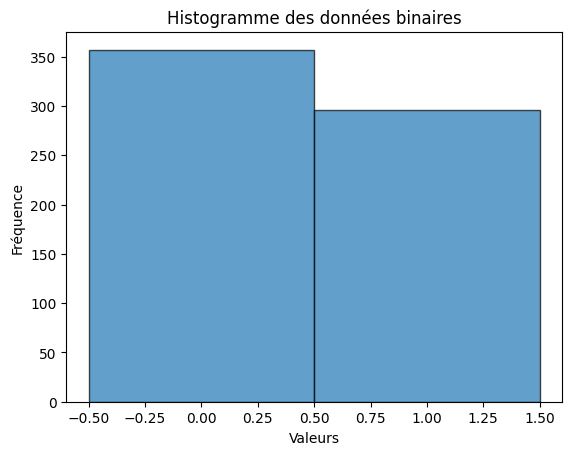

In [38]:
plt.hist(Y, bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)

# Ajouter des titres et des étiquettes
plt.title('Histogramme des données binaires')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [40]:
run_classfier(clfs, x_test, y_test)

RF
Accuracy  is: 0.792 +/- 0.080
AUC       is: 0.827 +/- 0.054
Precision is: 0.803 +/- 0.141
Recall    is: 0.706 +/- 0.103
KNN
Accuracy  is: 0.679 +/- 0.053
AUC       is: 0.708 +/- 0.054
Precision is: 0.694 +/- 0.128
Recall    is: 0.502 +/- 0.135
NaiveBayesSimple
Accuracy  is: 0.719 +/- 0.039
AUC       is: 0.798 +/- 0.067
Precision is: 0.803 +/- 0.105
Recall    is: 0.481 +/- 0.105
CART
Accuracy  is: 0.694 +/- 0.058
AUC       is: 0.699 +/- 0.068
Precision is: 0.656 +/- 0.110
Recall    is: 0.689 +/- 0.095
ID3
Accuracy  is: 0.703 +/- 0.080
AUC       is: 0.702 +/- 0.067
Precision is: 0.665 +/- 0.099
Recall    is: 0.686 +/- 0.108
DecisionStump
Accuracy  is: 0.759 +/- 0.041
AUC       is: 0.733 +/- 0.056
Precision is: 0.897 +/- 0.096
Recall    is: 0.507 +/- 0.091
MultilayerPerceptron
Accuracy  is: 0.716 +/- 0.072
AUC       is: 0.740 +/- 0.057
Precision is: 0.669 +/- 0.129
Recall    is: 0.604 +/- 0.137
kNN_5
Accuracy  is: 0.642 +/- 0.066
AUC       is: 0.678 +/- 0.074
Precision is: 0.598 +/- 0.

## 2. Normalisation

In [41]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

## 3. Condidérer toutes les données

In [42]:
df_scoring.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [43]:
X = df_scoring.drop(15, axis=1)
Y = df_scoring[13] 

In [44]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0


In [45]:
# Imputer les valeurs manquantes
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

### Traitement des valeurs manquantes

In [46]:
# Variable catégorielle
col_cat = [0,3,4,5,6,8,9,11]
X_cat = np.copy(X.iloc[:, col_cat])

for col_id in range(len(col_cat)):
 unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
 X_cat[:, col_id] = val_idx
    
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [47]:
# Variable numérique
col_num = [1,2,7,10,13,14]
X_num = np.copy(X.iloc[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

In [48]:
Y = Y.replace('+', 1)
Y = Y.replace('-', 0)

In [49]:
# Encoder les variables catégorielles
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()

In [50]:
X_cat_bin

array([[1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

### Entrainement

In [51]:
scaler_cat = StandardScaler()
scaler_cat.fit(X_num)
X_num_norm = scaler_cat.transform(X_num)
X_num_cat = np.concatenate((X_cat_bin,X_num_norm), axis=1)

Y_scoring = df_scoring.iloc[:,15].values
Y_num_cat_bin = np.where(Y_scoring=='+',1, 0)

In [52]:
run_classfier(clfs, X_num_cat,Y_num_cat_bin)

RF
Accuracy  is: 0.874 +/- 0.057
AUC       is: 0.939 +/- 0.037
Precision is: 0.853 +/- 0.064
Recall    is: 0.878 +/- 0.085
KNN
Accuracy  is: 0.853 +/- 0.050
AUC       is: 0.913 +/- 0.051
Precision is: 0.874 +/- 0.052
Recall    is: 0.792 +/- 0.077
NaiveBayesSimple
Accuracy  is: 0.734 +/- 0.046
AUC       is: 0.886 +/- 0.051
Precision is: 0.923 +/- 0.070
Recall    is: 0.460 +/- 0.121
CART
Accuracy  is: 0.790 +/- 0.062
AUC       is: 0.791 +/- 0.063
Precision is: 0.799 +/- 0.075
Recall    is: 0.767 +/- 0.075
ID3
Accuracy  is: 0.815 +/- 0.051
AUC       is: 0.807 +/- 0.050
Precision is: 0.809 +/- 0.042
Recall    is: 0.803 +/- 0.065
DecisionStump
Accuracy  is: 0.864 +/- 0.046
AUC       is: 0.870 +/- 0.047
Precision is: 0.796 +/- 0.057
Recall    is: 0.940 +/- 0.058
MultilayerPerceptron
Accuracy  is: 0.813 +/- 0.037
AUC       is: 0.894 +/- 0.053
Precision is: 0.830 +/- 0.055
Recall    is: 0.783 +/- 0.084
kNN_5
Accuracy  is: 0.850 +/- 0.052
AUC       is: 0.907 +/- 0.050
Precision is: 0.855 +/- 0.

# Classsification de texte 

In [53]:
df_spam = pd.read_csv('SMSSpamCollection.data', sep='\t', header = None)
df_spam.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Count Vectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
X_spam = df_spam[1]

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_spam).toarray()

In [63]:
Y = df_spam[0]
Y = np.where(Y == 'ham', 1, 0)

In [64]:
run_classfier(clfs, X, Y)

RF
Accuracy  is: 0.979 +/- 0.005
AUC       is: 0.989 +/- 0.005
Precision is: 0.976 +/- 0.006
Recall    is: 1.000 +/- 0.001
KNN
Accuracy  is: 0.897 +/- 0.015
AUC       is: 0.839 +/- 0.033
Precision is: 0.894 +/- 0.016
Recall    is: 1.000 +/- 0.000
NaiveBayesSimple
Accuracy  is: 0.884 +/- 0.020
AUC       is: 0.897 +/- 0.017
Precision is: 0.986 +/- 0.003
Recall    is: 0.879 +/- 0.021
CART
Accuracy  is: 0.973 +/- 0.008
AUC       is: 0.923 +/- 0.018
Precision is: 0.977 +/- 0.007
Recall    is: 0.990 +/- 0.004
ID3
Accuracy  is: 0.969 +/- 0.005
AUC       is: 0.917 +/- 0.016
Precision is: 0.975 +/- 0.005
Recall    is: 0.988 +/- 0.003
DecisionStump
Accuracy  is: 0.891 +/- 0.012
AUC       is: 0.599 +/- 0.022
Precision is: 0.890 +/- 0.013
Recall    is: 0.997 +/- 0.002
MultilayerPerceptron
Accuracy  is: 0.984 +/- 0.005
AUC       is: 0.982 +/- 0.008
Precision is: 0.983 +/- 0.004
Recall    is: 1.000 +/- 0.001
kNN_5
Accuracy  is: 0.914 +/- 0.013
AUC       is: 0.835 +/- 0.034
Precision is: 0.910 +/- 0.

KeyboardInterrupt: 

### Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X).toarray()

In [ ]:
run_classfier(clfs, X, Y)

### TruncatedSVD 

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
X = svd.fit(X)

In [ ]:
run_classfier(clfs, X, Y)

## Creation d'une pipeline

In [59]:
def pipeline_traitement() :  
  pipe = Pipeline([('count',CountVectorizer(stop_words = 'english')),
                   ('weight',TfidfTransformer()),
                   ("svd",TruncatedSVD(random_state=1))])
  return pipe

In [ ]:
pipe_nlp = pipeline_traitement()
pip_nlp_fit = pipe_nlp.fit(X_spam)